<a href="https://colab.research.google.com/github/tanisha0016/Clustering-Assignment/blob/main/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [3]:
def apply_clustering(X_processed, algorithm='kmeans', n_clusters=3):
    if algorithm == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
    elif algorithm == 'hierarchical':
        model = AgglomerativeClustering(n_clusters=n_clusters)
    elif algorithm == 'meanshift':
        bandwidth = estimate_bandwidth(X_processed, quantile=0.2)
        model = MeanShift(bandwidth=bandwidth)
    else:
        return None

    labels = model.fit_predict(X_processed)
    silhouette = silhouette_score(X_processed, labels)
    ch_score = calinski_harabasz_score(X_processed, labels)
    db_score = davies_bouldin_score(X_processed, labels)
    return silhouette, ch_score, db_score

In [4]:
def preprocess_data(X, technique='none'):
    if technique == 'normalize':
        return StandardScaler().fit_transform(X)
    elif technique == 'transform':
        return PowerTransformer().fit_transform(X)
    elif technique == 'pca':
        return PCA(n_components=2).fit_transform(X)
    elif technique == 't+n':
        transformed = PowerTransformer().fit_transform(X)
        return StandardScaler().fit_transform(transformed)
    elif technique == 't+n+pca':
        transformed = PowerTransformer().fit_transform(X)
        normalized = StandardScaler().fit_transform(transformed)
        return PCA(n_components=2).fit_transform(normalized)
    else:
        return X.values

In [5]:
results = []
preprocess_options = ['none', 'normalize', 'transform', 'pca', 't+n', 't+n+pca']
clustering_methods = ['kmeans', 'hierarchical', 'meanshift']
cluster_range = [3, 4, 5]

for method in clustering_methods:
    for prep in preprocess_options:
        for c in cluster_range:
            try:
                X_prep = preprocess_data(X, prep)
                if method == 'meanshift':
                    silhouette, ch_score, db_score = apply_clustering(X_prep, method, None)
                    cluster_used = 'auto'
                else:
                    silhouette, ch_score, db_score = apply_clustering(X_prep, method, c)
                    cluster_used = c
                results.append({
                    'Method': method,
                    'Preprocessing': prep,
                    'Clusters': cluster_used,
                    'Silhouette': round(silhouette, 3),
                    'Calinski-Harabasz': int(ch_score),
                    'Davies-Bouldin': round(db_score, 3)
                })
            except:
                results.append({
                    'Method': method,
                    'Preprocessing': prep,
                    'Clusters': c,
                    'Silhouette': 'NA',
                    'Calinski-Harabasz': 'NA',
                    'Davies-Bouldin': 'NA'
                })

In [6]:
results_df = pd.DataFrame(results)

In [8]:
for method in clustering_methods:
    display(
        results_df[results_df['Method'] == method].pivot_table(
            index='Preprocessing', columns='Clusters', values='Silhouette', aggfunc='mean'
        )
    )
    display(
        results_df[results_df['Method'] == method].pivot_table(
            index='Preprocessing', columns='Clusters', values='Calinski-Harabasz', aggfunc='mean'
        )
    )
    display(
        results_df[results_df['Method'] == method].pivot_table(
            index='Preprocessing', columns='Clusters', values='Davies-Bouldin', aggfunc='mean'
        )
    )


Clusters,3,4,5
Preprocessing,,,
none,0.551,0.498,0.493
normalize,0.480,0.385,0.345
pca,0.598,0.558,0.510
t+n,0.490,0.386,0.369
t+n+pca,0.531,0.439,0.420
transform,0.490,0.386,0.369


Clusters,3,4,5
Preprocessing,,,
none,561.0,529.0,495.0
normalize,157.0,206.0,202.0
pca,693.0,719.0,642.0
t+n,161.0,209.0,170.0
t+n+pca,184.0,264.0,282.0
transform,161.0,209.0,170.0


Clusters,3,4,5
Preprocessing,,,
none,0.666,0.754,0.819
normalize,0.789,0.870,0.944
pca,0.565,0.615,0.753
t+n,0.823,0.878,0.894
t+n+pca,0.760,0.764,0.767
transform,0.823,0.878,0.894


Clusters,3,4,5
Preprocessing,,,
none,0.554,0.489,0.484
normalize,0.447,0.401,0.331
pca,0.598,0.541,0.549
t+n,0.478,0.427,0.357
t+n+pca,0.521,0.484,0.423
transform,0.478,0.427,0.357


Clusters,3,4,5
Preprocessing,,,
none,558.0,515.0,488.0
normalize,222.0,201.0,192.0
pca,688.0,673.0,665.0
t+n,225.0,213.0,202.0
t+n+pca,256.0,266.0,266.0
transform,225.0,213.0,202.0


Clusters,3,4,5
Preprocessing,,,
none,0.656,0.795,0.820
normalize,0.803,0.979,0.974
pca,0.560,0.655,0.653
t+n,0.743,0.902,0.918
t+n+pca,0.637,0.713,0.739
transform,0.743,0.902,0.918


Clusters,auto
Preprocessing,
none,0.686
normalize,0.358
pca,0.562
t+n,0.342
t+n+pca,0.428
transform,0.342


Clusters,auto
Preprocessing,
none,509.0
normalize,133.0
pca,614.0
t+n,140.0
t+n+pca,151.0
transform,140.0


Clusters,auto
Preprocessing,
none,0.389
normalize,0.776
pca,0.558
t+n,0.776
t+n+pca,0.547
transform,0.776


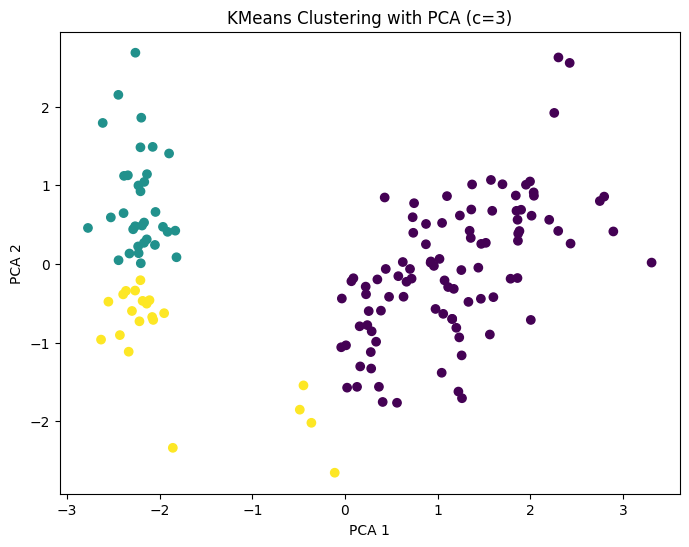

In [9]:
X_pca = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(X))
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_pca)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering with PCA (c=3)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.savefig("kmeans_pca_scatter.png")
plt.show()